In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Using Kmeans, DBSCAN, Hierarchical, Gaussian Mixture Model (GMM)
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score, jaccard_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load Iris data
data = datasets.load_iris(as_frame=True)

In [3]:
df = data.data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [26]:
# KMeans Clustering
kmeans = KMeans(n_clusters = 2, random_state = 42)
data['Clusters_KMeans'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


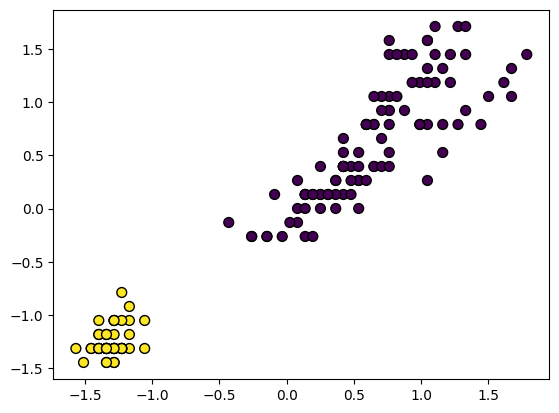

In [27]:
plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c= data['Clusters_KMeans'], cmap='viridis', edgecolors='k', s=50)
plt.show()

In [28]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Clusters_DBSCAN'] = dbscan.fit_predict(scaled_data)

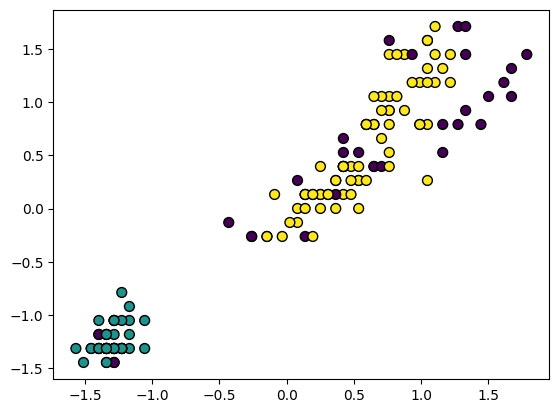

In [29]:
plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c= data['Clusters_DBSCAN'], cmap='viridis', edgecolors='k', s=50)
plt.show()

In [33]:
# Hierarchial Clustering
hierarchy = AgglomerativeClustering(n_clusters=3)
data['Clusters_Hierarchical'] = hierarchy.fit_predict(scaled_data)

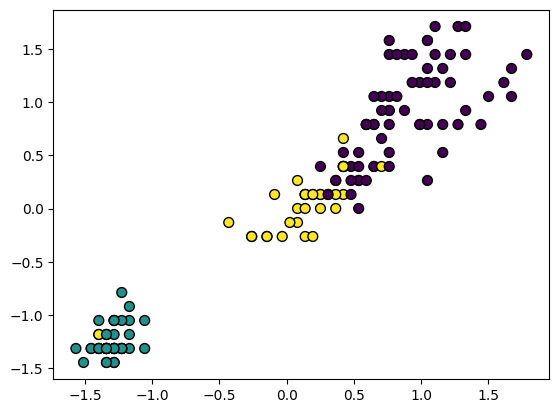

In [34]:
plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c= data['Clusters_Hierarchical'], cmap='viridis', edgecolors='k', s=50)
plt.show()

In [35]:
# GMM Clustering
gmm = GaussianMixture(n_components=3)
data['Clusters_GMM']= gmm.fit_predict(scaled_data)

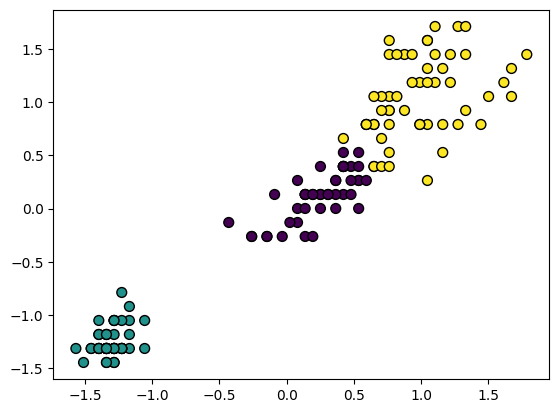

In [36]:
plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c= data['Clusters_GMM'], cmap='viridis', edgecolors='k', s=50)
plt.show()

In [43]:
# Evaluation using Silhouette and Calinski and Harabasz
silhouette_kmeans = silhouette_score(scaled_data, data['Clusters_KMeans'])
silhouette_dbscan = silhouette_score(scaled_data, data['Clusters_DBSCAN'])
silhouette_hierarchical = silhouette_score(scaled_data, data['Clusters_Hierarchical'])
silhouette_gmm = silhouette_score(scaled_data, data['Clusters_GMM'])

In [44]:
calinski_kmeans = calinski_harabasz_score(scaled_data, data['Clusters_KMeans'])
calinski_dbscan = calinski_harabasz_score(scaled_data, data['Clusters_DBSCAN'])
calinski_hierarchical = calinski_harabasz_score(scaled_data, data['Clusters_Hierarchical'])
calinski_gmm = calinski_harabasz_score(scaled_data, data['Clusters_GMM'])

In [48]:
print("Clustering Methods: KMeans, DBSCAN, AgglomerativeClustering , GaussianMixture")
print("Silhouette Scores:", silhouette_kmeans)
print("Silhouette Scores:", silhouette_dbscan)
print("Silhouette Scores:", silhouette_hierarchical)
print("Silhouette Scores:", silhouette_gmm)

print(" ")

print("Calinski Harabasz Scores:", calinski_kmeans)
print("Calinski Harabasz Scores:", calinski_dbscan)
print("Calinski Harabasz Scores:", calinski_hierarchical)
print("Calinski Harabasz Scores:", calinski_gmm)

Clustering Methods: KMeans, DBSCAN, Hierarchial Clustering , Gaussian Mixture Model
Silhouette Scores: 0.5817500491982808
Silhouette Scores: 0.35651648142700726
Silhouette Scores: 0.446689041028591
Silhouette Scores: 0.37416491866541235
 
Calinski Harabasz Scores: 251.34933946458113
Calinski Harabasz Scores: 84.5103303248468
Calinski Harabasz Scores: 222.7191638221536
Calinski Harabasz Scores: 187.77445116683722
